# Mean Encoding The Titanic dataset

The code is was a inspired from my Udemy online ML bootcamp course by Jose Portilla

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Look for Missing Data

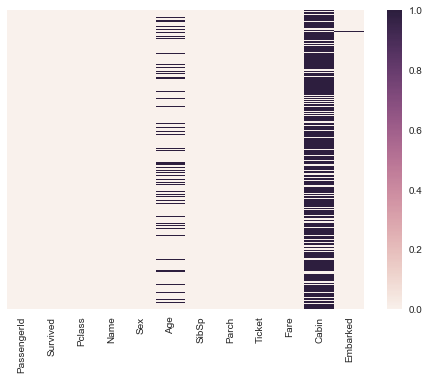

In [5]:
sns.heatmap(train.isnull(),yticklabels=False)
plt.show()

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In [16]:
train.drop('Cabin',axis=1,inplace=True)

In [18]:
train.drop('Name',axis=1,inplace=True)
train.drop('Ticket',axis=1,inplace=True)

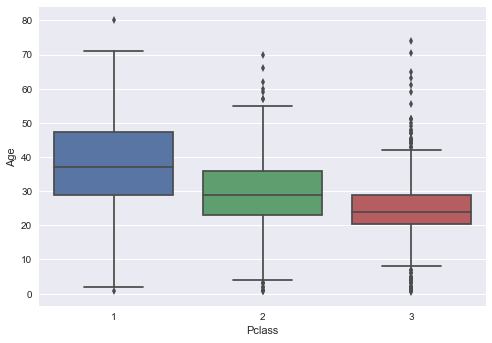

In [12]:
sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example here We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]   
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

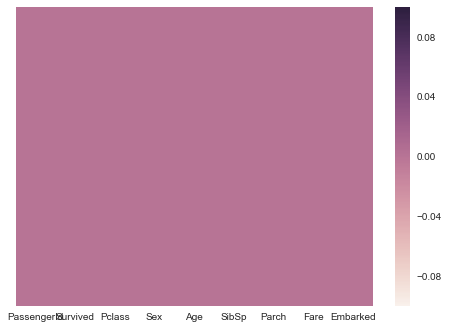

In [31]:
train = train.dropna()
sns.heatmap(train.isnull(),yticklabels=False)
plt.show()

## Using Label Encoding to encode Sex , Embarked columns

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['Sex'])
train['Sex']=le.transform(train['Sex']) 

In [51]:
le.fit(train['Embarked'])
train['Embarked']=le.transform(train['Embarked']) 

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


## Lets now incorporate Mean encodings

In [158]:
train = pd.read_csv('titanic_train.csv')
train.head()
train.drop('Cabin',axis=1,inplace=True)
train.drop('Name',axis=1,inplace=True)
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train.drop('Ticket',axis=1,inplace=True)

In [159]:
male = train[(train['Sex']=='male')]
m = len(male)/len(male[(male['Survived']==1)])

In [160]:
female = train[(train['Sex']=='female')]
f = len(female)/len(female[(female['Survived']==1)])

In [161]:
sex = train['Sex']

In [162]:
sex = [m if x=='male' else f for x in sex]

In [163]:
train['Sex'] = sex

## Mean encoded 'Sex' column

In [164]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,5.293578,22.0,1,0,7.2500,S
1,2,1,1,1.347639,38.0,1,0,71.2833,C
2,3,1,3,1.347639,26.0,0,0,7.9250,S
3,4,1,1,1.347639,35.0,1,0,53.1000,S
4,5,0,3,5.293578,35.0,0,0,8.0500,S


In [166]:
train = train.fillna(0)
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [201]:
S = train[(train['Embarked']=='S')]
s = len(S)/len(S[(S['Survived']==1)])

C = train[(train['Embarked']=='C')]
c = len(C)/len(C[(C['Survived']==1)])

Q = train[(train['Embarked']=='Q')]
q = len(Q)/len(Q[(Q['Survived']==1)])

nn = train[(train['Embarked']==0)]
nn = len(nn)/len(nn[(nn['Survived']==1)])

In [203]:
em = train['Embarked']
r=[]

In [204]:
for i in range(0,len(em)):
    if em[i] == 'S':
        r.append(s)
    elif em[i] =='C':
        r.append(c)
    elif em[i]=='Q':
        r.append(q)
    else:
        r.append(nn)

In [207]:
train['Embarked'] = r

## Mean encoded embarked column

In [208]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,5.293578,22.0,1,0,7.2500,2.967742
1,2,1,1,1.347639,38.0,1,0,71.2833,1.806452
2,3,1,3,1.347639,26.0,0,0,7.9250,2.967742
3,4,1,1,1.347639,35.0,1,0,53.1000,2.967742
4,5,0,3,5.293578,35.0,0,0,8.0500,2.967742
